# Ford Go Bike Trip Data
## by Marwan Tawfeek 

## Preliminary Wrangling

> This data is for a company that rent bikes for users in san francesco. It shows the trip duration, start time, end time, start station, end station, user type, user's birthyear and gender.

In [36]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [37]:
# Show the data 
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [38]:
df.shape

(183412, 16)

> #### The data set has 183412 rows and 16 columns.

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> #### Maximum trip duration is 23 hours and minimum trip duration is 61 seconds.
> #### The trip average time is 12 minutes.
> #### We have one user with birth year is 1878 which doesn't makes sense ( 143 Years old) 

In [5]:
df[df.member_birth_year == 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.1610,2019-02-25 09:53:17.0680,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386.0,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878.0,Female,No


In [6]:
df.drop(27370,inplace = True)

In [7]:
df[df.member_birth_year == 1878]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183411 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183411 non-null  int64  
 1   start_time               183411 non-null  object 
 2   end_time                 183411 non-null  object 
 3   start_station_id         183214 non-null  float64
 4   start_station_name       183214 non-null  object 
 5   start_station_latitude   183411 non-null  float64
 6   start_station_longitude  183411 non-null  float64
 7   end_station_id           183214 non-null  float64
 8   end_station_name         183214 non-null  object 
 9   end_station_latitude     183411 non-null  float64
 10  end_station_longitude    183411 non-null  float64
 11  bike_id                  183411 non-null  int64  
 12  user_type                183411 non-null  object 
 13  member_birth_year        175146 non-null  float64
 14  memb

In [9]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

> #### There is some missing values that we will deal with.

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:
df.duplicated().sum()

0

> #### There is no duplicated rows

In [12]:
df.nunique()

duration_sec                 4429
start_time                 174940
end_time                   174938
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              74
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

> #### The company has two different types of users.
> #### The company deals with 3 types of genders.
> #### It has almost 4607 bikes.

In [13]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [14]:
df.shape

(174951, 16)

In [15]:
# Change from seconds to minutes
df['duration_sec'] = df['duration_sec']/60
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,869.750000,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,1030.900000,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,608.166667,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,26.416667,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,29.883333,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [16]:
# Rename column to minutes
df = df.rename(columns={'duration_sec': 'duration_min'})

In [17]:
df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,869.750000,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,1030.900000,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,608.166667,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,26.416667,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,29.883333,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


In [18]:
df['duration_min'].describe()

count    174951.000000
mean         11.733306
std          27.370143
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

> #### Average time of the trip is 11.7 minutes
> #### The longest trip was 23.4 hours
> #### The shortest trip was just 1 minute

> #### We removed some useless columns.

### What is the structure of your dataset?

> We have 174951 trips in this dataset we have their duration, start time, end time, start station id, end station id, start station name, end station name, bike id , user type, birth year and gender.

### What is/are the main feature(s) of interest in your dataset?

> I'm intersted in knowing which age and gender do rent bikes more  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I'll mostly use user type, gender and birth year. 

## Univariate Exploration

> Let's explore some data! 

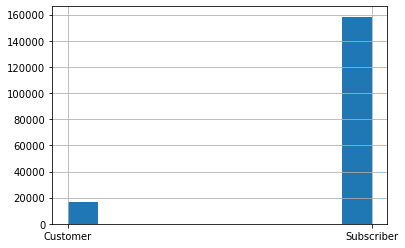

In [19]:
# Plotting User type 
df['user_type'].hist();

> #### Most of users are subscribers.

Male      130500
Female     40804
Other       3647
Name: member_gender, dtype: int64


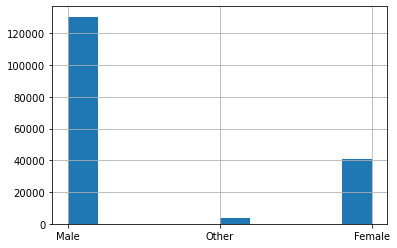

In [20]:
# Plotting the gender of the users
print(df['member_gender'].value_counts())
df['member_gender'].hist();

> #### 74.6% of the users are males, 23.3% are females and 2.1 are others.

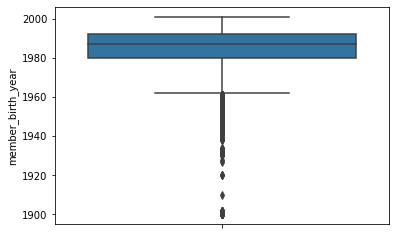

In [21]:
# PLotting the birth year of the users
sb.boxplot( data = df, y = 'member_birth_year');

> #### Most of users birth year range from 1980 to 1995



### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> - Most of users are males ( almost 75% )
> - About 87% of the users are subscribers not just custonmers. 
> - The average age is from 25 to 30 years old.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed that there were some missing values so i removed them and i found a user of 143 which doesn't make sense so i removed this trip. I also changed the duration column from seconds to minutes to be easier to use. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

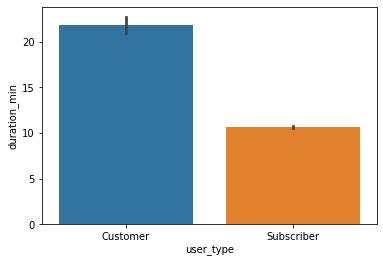

In [22]:
# Plotting the user type of the members to duration of the trip 
sb.barplot(x='user_type', y='duration_min', data=df);

> #### Customers spend more time than Subscribers.

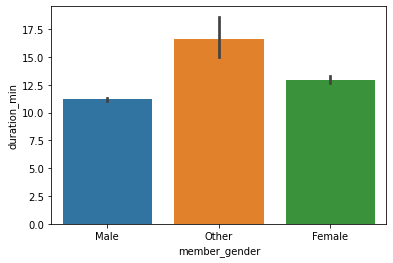

In [23]:
# Plotting the gender of the users to the trip duration 
sb.barplot(x='member_gender', y='duration_min', data=df);

> #### Others Trip duration is longer than both of the other genders

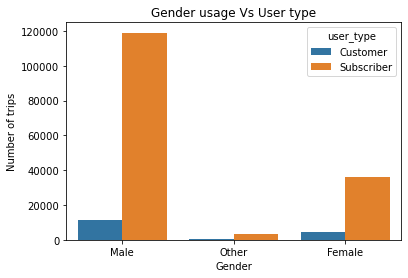

In [24]:
# Plotting the gender of the users to number of trips 
sb.countplot(data = df, x = 'member_gender', hue = 'user_type');
# Naming x axis
plt.xlabel('Gender')
# Naming the y axis 
plt.ylabel('Number of trips')
# Naming the title
plt.title('Gender usage Vs User type');

> #### Most of men are subscribers and most of the women are subscribers too but men are more than women.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can observe that Others gender spend more time on trips than the other two genders, we could also observe that most of of the users are subscribers but customers spend more time in trips than subscribers.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

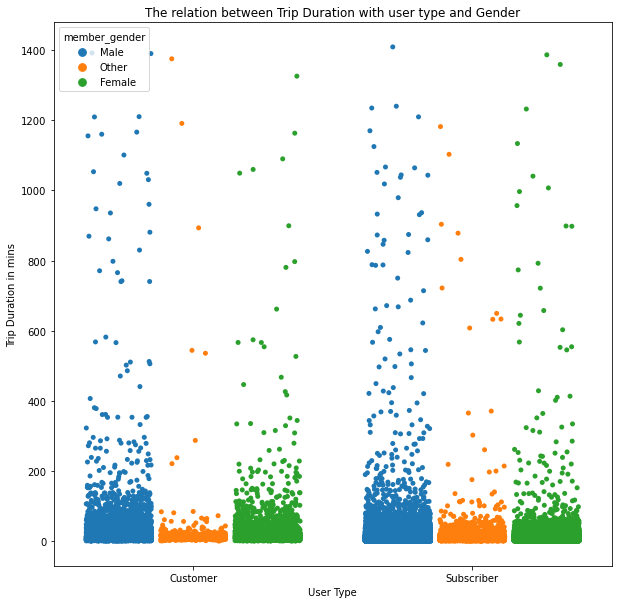

In [35]:
# Visuallizing the relation between trip duration with user type and gender 
plt.figure(figsize =[10, 10])
sb.stripplot(data =df, x="user_type", y="duration_min", hue = 'member_gender', jitter= 0.35, dodge =True)
# Naming the title 
plt.title("The relation between Trip Duration with user type and Gender")
# NAming x axis 
plt.xlabel("User Type")
# Naming y axis 
plt.ylabel("Trip Duration in mins");

> #### Here we can find that male subscribers spend more time on trips than male customers which is the same with all of the genders 

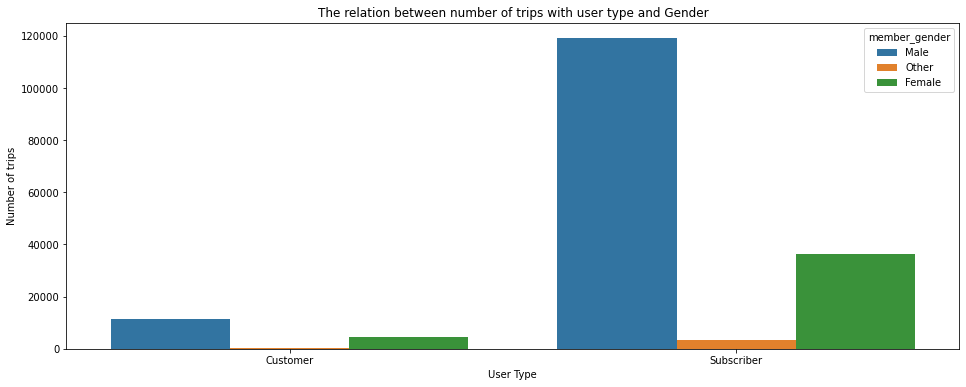

In [41]:
# Plotting relation between number of trips with gender and user type
plt.figure(figsize=(16, 6))
sb.countplot(data=df , x = 'user_type', hue ="member_gender")
# Naming x axis 
plt.xlabel('User Type');
# Naming y axis 
plt.ylabel('Number of trips');
# Naming the title 
plt.title("The relation between number of trips with user type and Gender");

> #### We can conclude that subscribers of all genders made more trips than customers of all genders. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We can see that there is no great difference between the gender subscribers or customers on the trip duration. 



> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!